## import library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## membaca dataset

In [11]:
df = pd.read_csv("play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


## informasi dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


## preprocessing data

In [15]:
# Encode semua kolom kategorikal
df_encoded = df.copy()
le = LabelEncoder()

for column in ['outlook', 'temp', 'humidity', 'wind', 'play']:
    df_encoded[column] = le.fit_transform(df_encoded[column])

df_encoded.head()

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1


In [37]:
from sklearn.preprocessing import LabelEncoder

# Buat dictionary untuk menyimpan encoder tiap kolom
encoders = {}
columns_to_encode = ['outlook', 'temp', 'humidity', 'wind']

# Lakukan encoding per kolom dan simpan encoder-nya
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Simpan encoder untuk referensi label aslinya

# Tampilkan hasil unique dari setiap kolom
for col in columns_to_encode:
    print(f"{col.upper()} (encoded): {df[col].unique()}")

# Tampilkan mapping label untuk setiap kolom
for col in columns_to_encode:
    print(f"\nLabel mapping untuk '{col}':")
    for i, label in enumerate(encoders[col].classes_):
        print(f"  {i} = {label}")

OUTLOOK (encoded): [2 0 1]
TEMP (encoded): [1 2 0]
HUMIDITY (encoded): [0 1]
WIND (encoded): [1 0]

Label mapping untuk 'outlook':
  0 = 0
  1 = 1
  2 = 2

Label mapping untuk 'temp':
  0 = 0
  1 = 1
  2 = 2

Label mapping untuk 'humidity':
  0 = 0
  1 = 1

Label mapping untuk 'wind':
  0 = 0
  1 = 1


## split data

In [50]:
X = df.drop(['day', 'play'], axis=1)
y = df['play']

In [62]:
# Split data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## pelatihan model

In [68]:
# Melatih model Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## evaluasi model

In [72]:
# Prediksi dan hitung akurasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

Akurasi Model: 0.2


## visualisasi Decision Tree

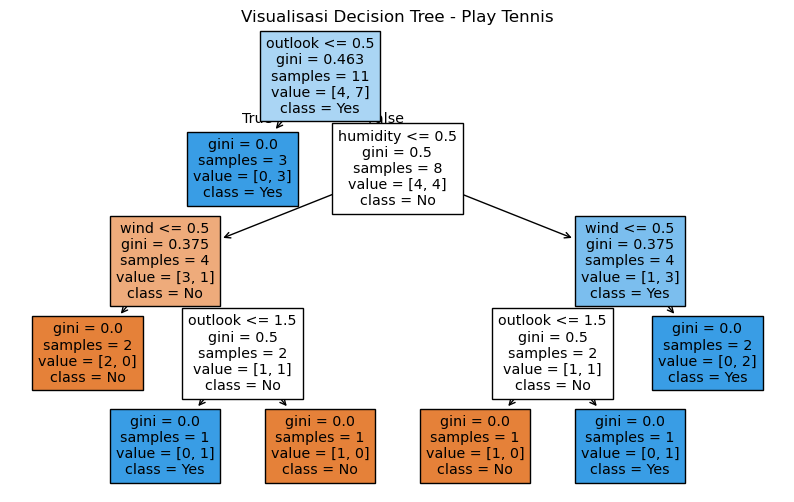

In [27]:
# Visualisasi pohon keputusan
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Visualisasi Decision Tree - Play Tennis")
plt.show()

In [70]:
depth = classifier.get_depth()
depth

3